### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

RANDOM_SEED =7124
LABELS = ["Normal", "Fraud"]

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Reading the data and lookng at the structure of the data. This data has 30 attributes and 1 lakh records
data = pd.read_csv("Fraud_data_amtstd.csv")
data.shape

(100000, 30)

In [3]:
#Looking at a sample of records
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.836500,-0.545419,-0.462979,0.537174,-0.426143,-0.100606,-0.584764,-0.103956,2.268429,-0.365185,...,0.085111,0.410736,0.137625,0.602906,-0.350260,0.464407,-0.070917,-0.030486,0.049882,0
1,-4.289880,-2.576061,-0.092256,1.976405,2.810033,-2.669128,-0.981883,-0.470310,-0.025692,0.099528,...,-0.473240,-0.307295,-2.789549,0.578976,-0.837979,0.372843,0.353451,-1.662202,-0.347171,0
2,1.131318,0.139818,0.586921,1.069291,-0.334908,-0.204938,-0.135526,0.043821,-0.121117,0.182139,...,-0.028126,-0.167062,-0.048054,-0.009912,0.417694,-0.479793,0.024360,0.023878,-0.208963,0
3,-0.866956,1.373947,1.948343,2.686750,-0.366790,0.568632,-0.278349,0.739536,-1.655955,0.708396,...,0.022719,-0.070619,-0.080307,0.000816,0.092167,0.159131,0.157940,-0.014370,-0.253595,0
4,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,...,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,-0.346230,0
5,1.178458,0.166055,-0.101567,0.369453,0.017198,-0.722891,0.396639,-0.187978,-0.483147,0.083094,...,-0.323048,-1.083814,0.049838,-0.002872,0.295810,0.135883,-0.074191,0.004364,-0.150527,0
6,1.869017,-0.202287,-0.218739,1.496434,-0.403332,-0.013593,-0.342586,0.129402,0.911017,0.149568,...,-0.458963,-1.058509,0.439679,-0.066668,-0.376792,-1.125226,0.053537,-0.039380,-0.305050,0
7,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,-0.535903,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,-0.347171,0
8,1.787763,-0.737892,-0.185794,0.362758,-0.550775,0.676564,-0.932369,0.390445,1.349983,-0.136095,...,0.331025,1.223539,0.264791,-0.541170,-0.571339,0.812785,0.017984,-0.054691,-0.232691,0
9,-1.055540,0.942471,0.986697,1.560551,-0.138755,-0.253645,0.622974,-0.321826,-0.215914,0.816454,...,0.153985,0.985031,0.204281,0.455561,-0.456576,-0.244140,-0.833487,-0.419773,-0.173549,0


0    99508
1      492
Name: Class, dtype: int64


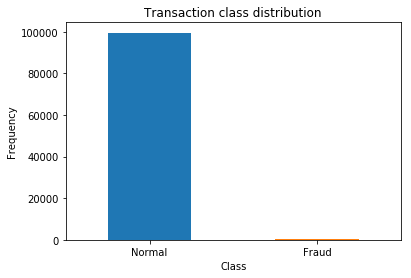

In [4]:
#PLotting the frequencies of fraud and non-fraud transactions in the data
count_classes = pd.value_counts(data['Class'], sort = True)
print(count_classes)

#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0)

#Giving titles and labels to the plot
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [5]:
from sklearn.model_selection import train_test_split
#Converting data to array
data = np.array(data)

In [6]:
#Splitting the data into train and test and observing their dimensions
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)

(80000, 30)
(20000, 30)


In [7]:
#Obtaining the fraud and non-fraud records in train
print(np.unique(X_train[:,29],return_counts=True))
print(np.unique(X_test[:,29],return_counts=True))

(array([0., 1.]), array([79591,   409], dtype=int64))
(array([0., 1.]), array([19917,    83], dtype=int64))


In [8]:
#Now consider only the non-fraud records for training
X_train_NF = X_train[X_train[:,-1] == 0]
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(79591, 29)


In [9]:
#Separating out the fraud records from the train 
X_train_F = X_train[X_train[:,-1] == 1]
print(X_train_F.shape)

(409, 30)


In [11]:
#Adding/concatenating the fraud records from train data to the test
X_test=np.concatenate((X_test,X_train_F),axis=0)
print(X_test.shape)

(20818, 30)


In [12]:
X_test,X_eval = train_test_split(X_test, test_size=0.2, random_state=RANDOM_SEED)

In [13]:
print(X_test.shape)
print(X_eval.shape)

(16654, 30)
(4164, 30)


In [14]:
#Separating the independent and the class variable
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [15]:
#Expanding the dimensions of y for later concatenation
y_test = np.expand_dims(y_test, axis=1)
y_test.shape

(16654, 1)

#### Model Building

In [17]:
input_dim = X_train_NF.shape[1]
encoding_dim = 15

In [18]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [19]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [20]:
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train_NF, X_train_NF,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.3,
                    verbose=1).history)

Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 43us/step - loss: 0.6996 - mean_squared_error: 0.6996 - val_loss: 0.3801 - val_mean_squared_error: 0.3801
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 39us/step - loss: 0.4164 - mean_squared_error: 0.4164 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3702 - mean_squared_error: 0.3702 - val_loss: 0.2411 - val_mean_squared_error: 0.2411
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3583 - mean_squared_error: 0.3583 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 39us/step - loss: 0.3531 -

Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3259 - mean_squared_error: 0.3259 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3283 - mean_squared_error: 0.3283 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3290 - mean_squared_error: 0.3290 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3287 - mean_squared_error: 0.3287 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 41us/step - loss: 0.3278 -

Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 39us/step - loss: 0.3257 - mean_squared_error: 0.3257 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3272 - mean_squared_error: 0.3272 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3222 - mean_squared_error: 0.3222 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3270 - mean_squared_error: 0.3270 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 2s 38us/step - loss: 0.3281 -

In [21]:
hist[0:5]

[{'val_loss': [0.38005120787915897],
  'val_mean_squared_error': [0.38005120787915897],
  'loss': [0.6995537196713345],
  'mean_squared_error': [0.6995537196713345]},
 {'val_loss': [0.26545556668301046],
  'val_mean_squared_error': [0.26545556668301046],
  'loss': [0.4163782178693383],
  'mean_squared_error': [0.4163782178693383]},
 {'val_loss': [0.2411345892052014],
  'val_mean_squared_error': [0.2411345892052014],
  'loss': [0.3702467727968287],
  'mean_squared_error': [0.3702467727968287]},
 {'val_loss': [0.22976043123312856],
  'val_mean_squared_error': [0.22976043123312856],
  'loss': [0.35831103631477523],
  'mean_squared_error': [0.35831103631477523]},
 {'val_loss': [0.22916333335424868],
  'val_mean_squared_error': [0.22916333335424868],
  'loss': [0.35310092635584206],
  'mean_squared_error': [0.35310092635584206]}]

In [22]:
## Making predictions on the train data
predictions=autoencoder.predict(X_train_NF)

In [23]:
predictions[0:2]

array([[-1.64127493e+00,  8.64178300e-01,  1.67897320e+00,
         8.42323303e-01, -8.36604238e-01,  5.69799602e-01,
        -5.76715708e-01,  1.15235829e+00,  4.97222126e-01,
        -7.53913224e-01, -1.43701839e+00,  3.60802770e-01,
        -9.79655087e-01, -1.69507980e-01, -1.80152750e+00,
        -4.43888962e-01,  4.60821897e-01, -3.46859545e-02,
         1.03266783e-01,  1.59416050e-02, -1.05432838e-01,
         9.83073562e-02, -1.65940747e-02, -5.82004450e-02,
        -1.28182536e-02,  5.91138452e-02, -1.24624707e-02,
         3.44233885e-02, -2.07527161e-01],
       [ 1.34040797e+00, -3.50826621e-01,  1.29697084e-01,
        -4.45682406e-01, -7.14094222e-01, -1.46277916e+00,
        -1.30317450e-01, -3.39976668e-01, -1.06451082e+00,
         7.09093571e-01,  1.55913830e-01,  5.11288643e-04,
         4.06116664e-01,  1.64511085e-01,  1.88157082e-01,
        -5.57780862e-02, -1.22675836e-01, -9.70042646e-02,
        -6.66358992e-02, -3.92480046e-02, -1.01521313e-02,
         3.51

In [24]:
##We want to separate out fraud records and non-fraud records for later use
f = np.hstack((X_test,y_test))
print(f.shape)

test_nf=f[f[:,29]==0]
print(test_nf.shape)

test_f=f[f[:,29]==1]
print(test_f.shape)

(16654, 30)
(15931, 30)
(723, 30)


In [25]:
#Getting the errors from the non fraud data separately 
autoencoder.evaluate(test_nf[:,:29],test_nf[:,:29])

15931/15931 [==============================] - 0s 16us/step


[0.225147445524871, 0.225147445524871]

In [26]:
#Getting the errors from the fraud data separately
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])

723/723 [==============================] - 0s 68us/step


[19.16120733891615, 19.16120733891615]

In [27]:
#Obtaining predictions for non fraud records
predictions_nf=autoencoder.predict(test_nf[:,:29])

In [28]:
#Obtaining predictions for fraud records
predictions_f=autoencoder.predict(test_f[:,:29])

In [29]:
#Identifying the error computation method by autoencoder(Mean Squared Error). The computation is as follows 
np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.22514744415513402

In [30]:
#Computing errors on the non-fraud data
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)

In [31]:
errors_nf[0:5]

array([0.03547175, 0.04206122, 0.41240355, 0.11981173, 0.06523133])

In [32]:
#Computing errors on the fraud data
errors_f = np.mean(np.square(np.abs(test_f[:,:29]-predictions_f)), axis=1)

In [33]:
errors_f[0:5]

array([ 8.5369563 , 63.54879695,  2.89292737,  0.41545727,  0.15957598])

In [34]:
#Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.01183803474417335
111.87228290795944
0.12085370560609035
0.030985393238905787
137.08643728987414
7.965452229253221


{'whiskers': [<matplotlib.lines.Line2D at 0x17da05910b8>,
 'caps': [<matplotlib.lines.Line2D at 0x17da0591978>,
 'boxes': [<matplotlib.lines.Line2D at 0x17da0583f28>],
 'medians': [<matplotlib.lines.Line2D at 0x17da0598208>],
 'fliers': [<matplotlib.lines.Line2D at 0x17da0598630>],
 'means': []}

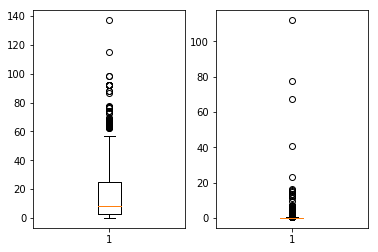

In [35]:
#PLotting the error box plots 

plt.subplot(1, 2,1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

In [36]:
#Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud
print(sum(errors_nf>np.median(errors_f)))
print(sum(errors_f<np.median(errors_f)))
print(sum(errors_f<np.median(errors_nf)))
sum(errors_nf>np.median(errors_nf))

16
360
41


7965

In [37]:
print(errors_nf.shape)
print(errors_f.shape)

(15931,)
(723,)


In [38]:
print(predictions_nf.shape)
print(predictions_f.shape)

(15931, 29)
(723, 29)


In [39]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))

train_pred = autoencoder.predict(X_train_NF[:,:29])
mean_recon = (((train_pred - X_train_NF)**2).mean(-1).mean())

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []

th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_recon)
    

In [40]:
X_test.shape

(16654, 29)

2.825767052103589


array([[15867,    64],
       [  162,   561]], dtype=int64)

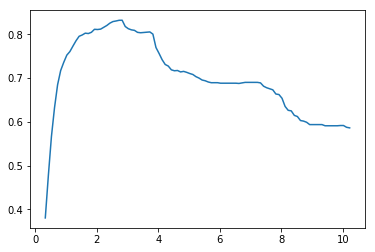

In [41]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

fraud = (test_recon>thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [42]:
##Predicting on Valdation 

predictions_eval=autoencoder.predict(X_eval[:,:29])


In [43]:
errors_eval=np.square(np.subtract(predictions_eval,X_eval[:,:29]))

In [44]:
fraud_eval=(((errors_eval-X_eval[:,:29])**2).mean(-1))>2.925861360803925

In [45]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval))

[[3678  308]
 [  29  149]]
